<a href="https://colab.research.google.com/github/DAnand05/DAnand05/blob/main/trash_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls /content/drive/MyDrive/trashnet.zip


/content/drive/MyDrive/trashnet.zip


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/trashnet.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense

In [7]:
# Data directories
train_dir = "/content/data/train"
val_dir = "/content/data/test"
test_dir = "/content/data/test"  # Optional for final evaluation



In [8]:
# Image size for preprocessing
img_width, img_height = 224, 224


In [9]:
# Data augmentation configuration
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    fill_mode="nearest"
)


In [10]:
# Train data generator with augmentation
train_datagen = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust batch size based on GPU memory
    class_mode="categorical"  # Multi-class classification
)

# Validation data generator (no augmentation)
val_datagen = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode="categorical"
)


Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [11]:
# Pre-trained VGG16 model (include weights='imagenet')
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False  # Freeze base model layers


In [12]:
# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)  # Experiment with different neuron numbers
predictions = Dense(6, activation="softmax")(x)  # Output layer for 6 trash classes


In [13]:
# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)  # Experiment with different neuron numbers
predictions = Dense(6, activation="softmax")(x)  # Output layer for 6 trash classes

In [14]:
# Create the final model
model = keras.Model(inputs=base_model.input, outputs=predictions)



In [15]:
# Model compilation (adjust learning rate, optimizer based on hyperparameter tuning)
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [17]:
# Model training
history = model.fit(
    train_datagen,
    steps_per_epoch=len(train_datagen),  # Adjust based on training data size
    epochs=20,  # Adjust epochs based on validation results
    validation_data=val_datagen,
    validation_steps=len(val_datagen)  # Adjust based on validation data size
)

Epoch 1/20
64/64 [==============================] - 53s 831ms/step - loss: 1.0105 - accuracy: 0.6092 - val_loss: 1.1497 - val_accuracy: 0.5650
Epoch 2/20
64/64 [==============================] - 38s 599ms/step - loss: 0.7509 - accuracy: 0.7172 - val_loss: 0.9145 - val_accuracy: 0.6909
Epoch 3/20
64/64 [==============================] - 38s 590ms/step - loss: 0.6220 - accuracy: 0.7712 - val_loss: 0.9052 - val_accuracy: 0.7087
Epoch 4/20
64/64 [==============================] - 40s 622ms/step - loss: 0.4822 - accuracy: 0.8232 - val_loss: 0.9465 - val_accuracy: 0.6713
Epoch 5/20
64/64 [==============================] - 41s 637ms/step - loss: 0.4532 - accuracy: 0.8415 - val_loss: 1.0800 - val_accuracy: 0.6673
Epoch 6/20
64/64 [==============================] - 41s 642ms/step - loss: 0.3957 - accuracy: 0.8583 - val_loss: 0.9544 - val_accuracy: 0.7165
Epoch 7/20
64/64 [==============================] - 38s 601ms/step - loss: 0.3752 - accuracy: 0.8697 - val_loss: 0.9786 - val_accuracy: 0.6969

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV

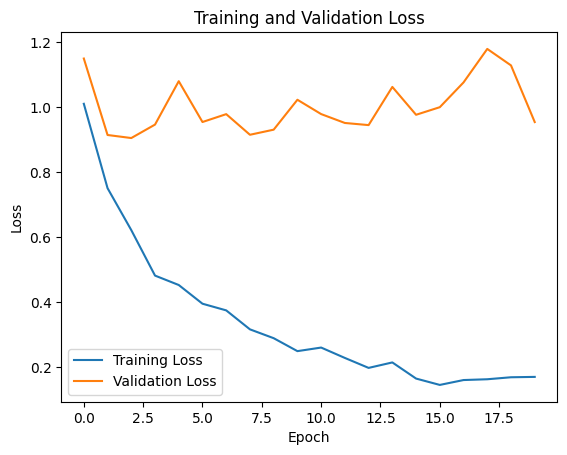

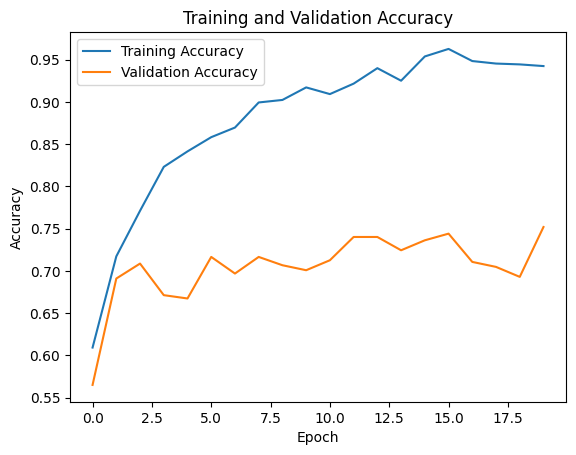

In [20]:
#Visualizing results

import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss curve
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy curve
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
import numpy as np
from sklearn.metrics import classification_report

# Model evaluation on test set (optional)
if test_dir:
    test_datagen = datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical"
    )
    test_loss, test_acc = model.evaluate(test_datagen)
    print("Test accuracy:", test_acc)



    # Get predictions on test data
    model_type = type(model).__name__
    if model_type == "Functional":
        test_predictions = model.predict(test_datagen)
        test_predictions = np.argmax(test_predictions, axis=1)
    else:
        test_predictions = model.predict_classes(test_datagen)

    # Get true labels from test data generator
    test_labels = test_datagen.classes

    # Print classification report
    print(classification_report(test_labels, test_predictions))




Found 508 images belonging to 6 classes.
16/16 [==============================] - 14s 860ms/step - loss: 1.0042 - accuracy: 0.7283
Test accuracy: 0.7283464670181274
16/16 [==============================] - 6s 403ms/step
              precision    recall  f1-score   support

           0       0.11      0.12      0.12        81
           1       0.25      0.22      0.23       101
           2       0.17      0.18      0.18        82
           3       0.27      0.32      0.29       119
           4       0.19      0.19      0.19        97
           5       0.00      0.00      0.00        28

    accuracy                           0.20       508
   macro avg       0.17      0.17      0.17       508
weighted avg       0.20      0.20      0.20       508



In [44]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
# Save the model for future use (optional)
model.save("trash_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
model.save("trash_classifier.keras")